<img src = "https://faithmag.com/sites/default/files/styles/article_full/public/2018-09/titanic2.jpg?h=6521bd5e&itok=H8td6QVv">

# <font>The Titanic Dataset</font>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#################import other libraries you might need#################
df = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv")

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,C23 C25 C27,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,C23 C25 C27,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,C23 C25 C27,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,C23 C25 C27,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,C23 C25 C27,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C23 C25 C27,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,C23 C25 C27,Q


# clean the data

In [128]:
# check the nulls in the data
df.isnull().sum()
# if there are nulls, consider filling the missing values with column mean or median


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
df['Age']=df['Age'].fillna(value=df['Age'].median())

In [130]:
df['Cabin']=df['Cabin'].fillna(value='C23 C25 C27 ')

In [131]:
df.Cabin.value_counts()

C23 C25 C27     687
C23 C25 C27       4
B96 B98           4
G6                4
D                 3
               ... 
B78               1
E34               1
C106              1
E77               1
E17               1
Name: Cabin, Length: 148, dtype: int64

In [132]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

# data exploration and summaries

In [124]:
# get the data summary for the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
df.set_index('PassengerId',inplace=True)

In [92]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp']+(int(1))

In [93]:
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3


In [139]:
# how many people survived  -  how many died?df
df.groupby('Survived').size()


Survived
0    549
1    342
dtype: int64

In [138]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

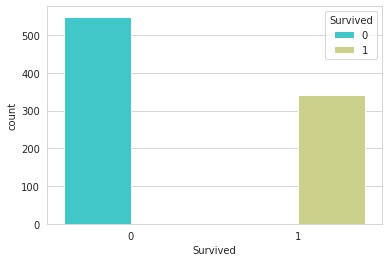

In [95]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Survived',data=df,palette='rainbow')

In [140]:
#What was the percentage of men and women in the data? ( create a pie chart)
import matplotlib.pyplot as plt
df.groupby('Sex').size()


Sex
female    314
male      577
dtype: int64

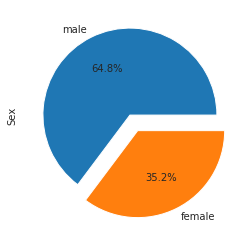

In [147]:
df.Sex.value_counts().plot(kind="pie",autopct='%1.1f%%',explode=[0,0.2])

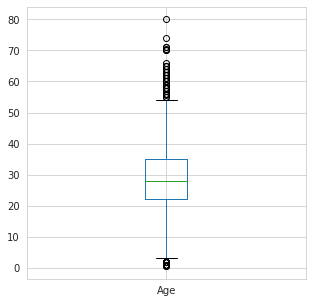

In [148]:
# what was the median Age(Make a box plot)
df['Age'].plot(kind="box", figsize =(5,5)) 

In [160]:
import plotly.express as px
px.box(df,y='Age')

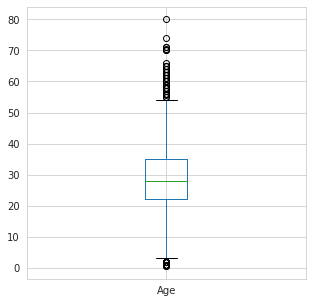

In [161]:
# make a boxplot for men and women seperately and comment on which gender has the higher median Age
sns.boxplot()

In [164]:
# on average which gender paid the highest median Fare?
df.groupby('Sex')['Fare'].agg(['mean', 'median','std','count'])

#FEMALE

,mean,median,std,count
Sex,,,,
female,44.479818,23.0,57.997698,314
male,25.523893,10.5,43.138263,577


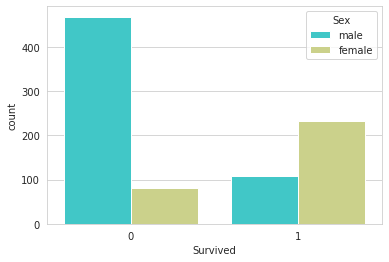

In [101]:
# Bill burr said that women had a higher chance of survival? is this true?
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')

#THE OBSERVATION FROM THE GRAPH INDICATES THAT MORE MEN DIED THAND WOMEN AND THE OPPOSITE IS TRUE

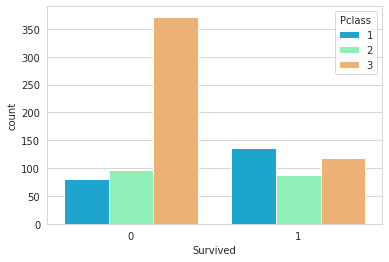

In [166]:
#which persanger class survived more and which died more?  -  also make an appropriate plot for this
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

#The survival rate is Good for class 1 and less for class 3


In [173]:
df.groupby(['Pclass','Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [103]:
# what was the average fare paid by each Survival class?
df.groupby('Survived').Fare.mean() 

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [104]:
# Having analyzed this data: is it true to say that if you were a woman who paid.../
#alot of money on first class tickets you would have a higher chance of survival?

#absolutely TRUE

# Machine learning

In [105]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [205]:
# split the data into x and y with y 
#x# is the numeric columns
#y# is the survived class ( we want to predict whether someone survived given the numeric characteristics)
x=df[['Pclass','Age','SibSp','Parch','Fare']]
y=df['Survived']

In [206]:
# do a train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [207]:
# Initialize a machine learning model and train it ( use logistic -  this is a classification problem)
# even if the Y seems numeric, it has few numbers therefore they are taken as classes
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
# test the model a ccuracy
Prediction = model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [209]:
accuracy_score(Prediction,y_test)

0.7333333333333333

In [203]:
confusion_matrix(Prediction,y_test)

array([[48, 17],
       [10, 15]])

In [204]:
# generate a dummy person data and see if the model can predict this person ( this person should be an np array)
P=[[3, 45, 2, 2, 30],[1, 28, 0, 0, 60]]
P=np.array(P)


model.predict(P)

array([0, 1])

# Extra credit problem/

In [ ]:
# you can also use the non numeric columns in the data as part of the X through converting them to numeric using dummy variables
# include a dummy variable for sex in your X and repeat the ML process ( did the model imporve?)#
# there is a class of models that can be used for machine learning called ensemble models such as Random Forest - try an RF classifier
# did your model improve?
# you could use a Confusion Matrix to test model performance?
# did you manage?